# Setting

In [242]:
import pandas as pd
import numpy as np
from IPython.display import display
from info_enhance import *

import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
bud = pd.read_csv('Budget.csv')
trans = pd.read_csv('personal_transactions.csv')
trans.Date = pd.to_datetime(trans.Date)

# Overview:

In [244]:
print('Budget:--------------------------------------------------------------')
display(bud.head(5))
bud_ = infoOut(bud,vunique=True)
display(bud_)
print('Transaction:--------------------------------------------------------------')
display(trans.head(5))
trans_ = infoOut(trans,vunique=True)
display(trans_)

Budget:--------------------------------------------------------------


,Category,Budget
0,Alcohol & Bars,50
1,Auto Insurance,75
2,Coffee Shops,15
3,Electronics & Software,0
4,Entertainment,25


,Column,Non-Null Count,Dtype,Unique
0,Category,19,object,Entertainment Coffee Shops Home Improvement Mu...
1,Budget,19,int64,0 65 100 75 1100 11 15 50 150 25 250 30


Transaction:--------------------------------------------------------------


,Date,Description,Amount,Transaction Type,Category,Account Name
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card


,Column,Non-Null Count,Dtype,Unique
0,Date,806,datetime64[ns],2018-06-20 00:00:00 2018-12-24 00:00:00 2019-0...
1,Description,806,object,State Farm Irish Restaurant Conoco Seafood Res...
2,Amount,806,float64,1.75 2.0 3.0 4.0 3.5 5.09 6.41 8.0 8.49 10.69 ...
3,Transaction Type,806,object,debit credit
4,Category,806,object,Entertainment Coffee Shops Home Improvement Mu...
5,Account Name,806,object,Silver Card Checking Platinum Card


### Null-value

In [245]:
print('Budget:--------------------------------------------------------------')
print(bud.isnull().sum())
print('Transaction:--------------------------------------------------------------')
print(trans.isnull().sum())

Budget:--------------------------------------------------------------
Category    0
Budget      0
dtype: int64
Transaction:--------------------------------------------------------------
Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account Name        0
dtype: int64


# Start

In [246]:
da = trans.iloc[:,:]
# display(da.head(5))
da["Month"] = da["Date"].map(lambda ts: ts.strftime("%m"))
# display(da.head(5))
da.groupby('Month').size()

Month
01    60
02    68
03    77
04    86
05    74
06    75
07    81
08    73
09    80
10    38
11    43
12    51
dtype: int64

In [247]:
cols = ['Description', 'Amount', 'Transaction Type', 'Category',
        'Account Name', 'Month']
db = da.loc[:,cols]
db.set_index('Month')

display(db.head(5))
print(db.groupby('Month')['Transaction Type'].unique())

,Description,Amount,Transaction Type,Category,Account Name,Month
0,Amazon,11.11,debit,Shopping,Platinum Card,01
1,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,01
2,Thai Restaurant,24.22,debit,Restaurants,Silver Card,01
3,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,01
4,Netflix,11.76,debit,Movies & DVDs,Platinum Card,01


Month
01    [debit, credit]
02    [debit, credit]
03    [debit, credit]
04    [debit, credit]
05    [debit, credit]
06    [debit, credit]
07    [debit, credit]
08    [debit, credit]
09    [debit, credit]
10    [debit, credit]
11    [debit, credit]
12    [debit, credit]
Name: Transaction Type, dtype: object


In [248]:
debit_per_month = da[da['Transaction Type']=='debit'].groupby('Month')['Transaction Type'].count()
credit_per_month = da[da['Transaction Type']=='credit'].groupby('Month')['Transaction Type'].count()
debit_credit_per_month = pd.concat([debit_per_month,credit_per_month],axis=1,join='inner')
debit_credit_per_month.columns = ['Debit_per_month (times)','Credit_per_month (times)']
display(debit_credit_per_month)

,Debit_per_month (times),Credit_per_month (times)
Month,,
01,51,9
02,58,10
03,66,11
04,74,12
05,65,9
06,63,12
07,69,12
08,59,14
09,67,13


In [249]:
debit_credit_per_month_1 = debit_credit_per_month.loc[:,:]

In [250]:
debit_credit_per_month.reset_index(inplace=True)
dfm = debit_credit_per_month.melt('Month',var_name = 'cols',value_name = 'vals')

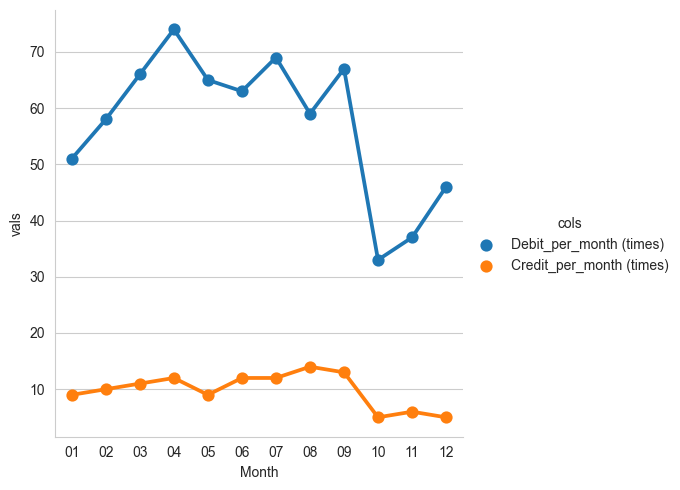

In [251]:
fig = sns.catplot(x='Month',y='vals',hue='cols',data=dfm,kind='point')
sns.set_style('whitegrid')

(0.0, 100.0)

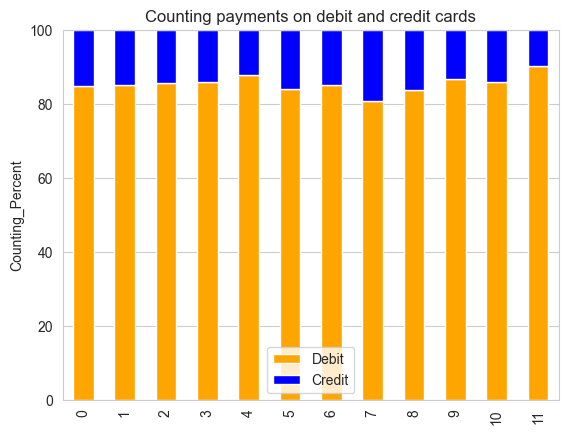

In [252]:
sum_column = debit_credit_per_month_1['Debit_per_month (times)']+debit_credit_per_month_1['Credit_per_month (times)']
debit_percent = debit_credit_per_month_1['Debit_per_month (times)']*100/sum_column
credit_percent = debit_credit_per_month_1['Credit_per_month (times)']*100/sum_column
debit_credit_per_month_1['Debit']=debit_percent
debit_credit_per_month_1['Credit']=credit_percent
debit_credit_per_month_1.drop(['Debit_per_month (times)','Credit_per_month (times)'],axis=1,inplace=True)
debit_credit_per_month_1.plot(kind='bar',stacked=True,color=['Orange','Blue']).set(title='Counting payments on debit and credit cards')
plt.ylabel('Counting_Percent')
plt.ylim([0,100])

Text(0, 0.5, 'Sum_Percent')

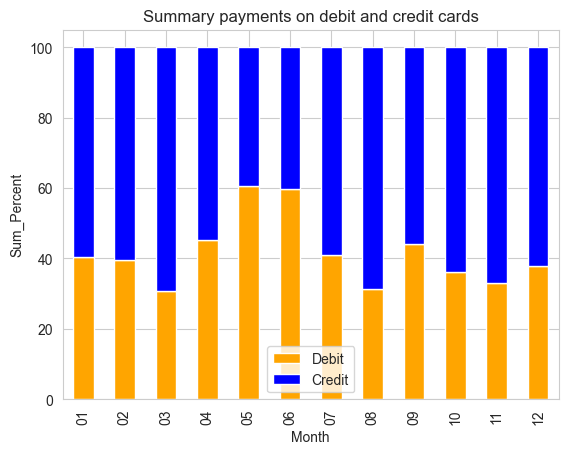

In [253]:
debit_per_month_sum = da[da['Transaction Type']=='debit'].groupby('Month')['Amount'].sum()
credit_per_month_sum = da[da['Transaction Type']=='credit'].groupby('Month')['Amount'].sum()
debit_credit_per_month_sum = pd.concat([debit_per_month_sum,credit_per_month_sum],axis=1,join='inner')
debit_credit_per_month_sum.columns = ['Debit_per_month','Credit_per_month']

sum_column = debit_credit_per_month_sum['Debit_per_month'] + debit_credit_per_month_sum['Credit_per_month']
debit_sum_percent = debit_credit_per_month_sum['Debit_per_month']*100/sum_column
credit_sum_percent = debit_credit_per_month_sum['Credit_per_month']*100/sum_column
debit_credit_sum = pd.concat([debit_sum_percent,credit_sum_percent],axis=1,join='inner')
debit_credit_sum.columns = ['Debit','Credit']
debit_credit_sum.plot(kind='bar',stacked=True,color=['Orange','Blue']).set(title='Summary payments on debit and credit cards')
plt.ylabel('Sum_Percent')
plt.ylim([0,100])

In [254]:
display(db.head(5))
df_ = db[db['Transaction Type']=='debit'].groupby('Category')['Amount'].sum().reset_index()
display(df_)

,Description,Amount,Transaction Type,Category,Account Name,Month
0,Amazon,11.11,debit,Shopping,Platinum Card,01
1,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking,01
2,Thai Restaurant,24.22,debit,Restaurants,Silver Card,01
3,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card,01
4,Netflix,11.76,debit,Movies & DVDs,Platinum Card,01


,Category,Amount
0,Alcohol & Bars,539.13
1,Auto Insurance,1350.00
2,Coffee Shops,115.54
3,Credit Card Payment,33041.36
4,Electronics & Software,719.00
5,Entertainment,9.62
6,Fast Food,330.63
7,Food & Dining,77.75
8,Gas & Fuel,1715.17
9,Groceries,2795.21


[Text(0.5, 0, 'Amount (temp $)')]

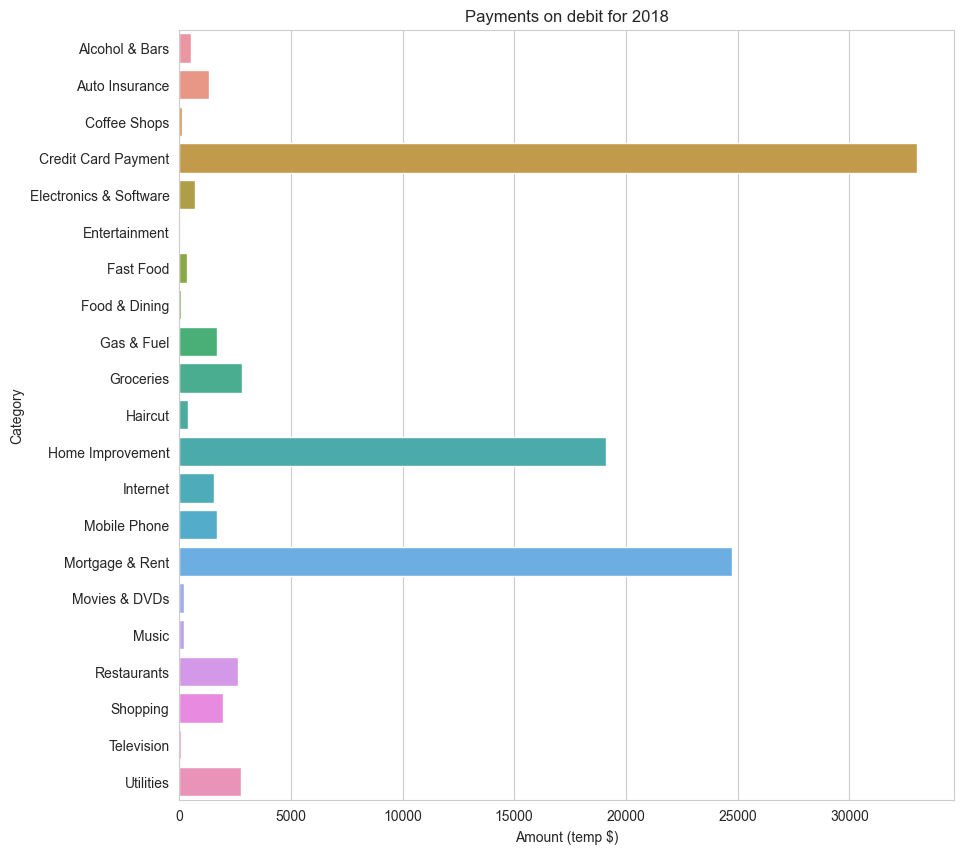

In [255]:
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(data=df_,x="Amount",y="Category").set(title = 'Payments on debit for 2018')
sns.set_style('whitegrid')
ax.set(xlabel = 'Amount (temp $)')

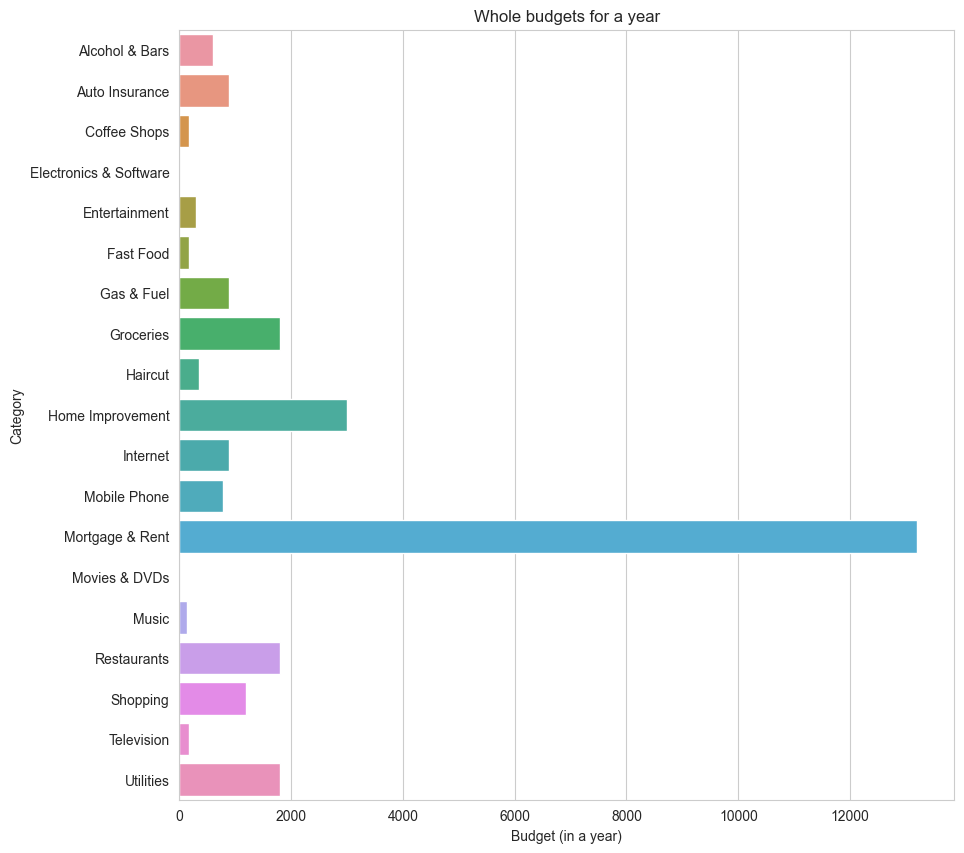

In [256]:
bud['Budget (in a year)'] = bud['Budget']*12
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Budget (in a year)',y='Category',data=bud).set(title = 'Whole budgets for a year')
sns.set_style('whitegrid')

In [257]:
# display(db[(db['Category']=='Credit Card Payment') & (db['Transaction Type']=='debit')])

# Checking_state = db[db['Account Name']=='Checking']
# display('Checking credit Card Payments by debit card: {}'.format(Checking_state.groupby('Category').size()['Credit Card Payment']))
# display('Total credit Card Payments: {}'.format(trans.groupby('Category').size()['Credit Card Payment']))

In [258]:
credit_payment_debit = db[(db['Category']=='Credit Card Payment')&(db['Transaction Type']=='debit')].groupby('Transaction Type')['Amount'].sum()
credit_payment_credit = db[db['Transaction Type']=='credit'].groupby('Transaction Type')['Amount'].sum()
debit_payment_debit = db[db['Transaction Type']=='debit'].groupby('Transaction Type')['Amount'].sum()

display(credit_payment_debit['debit'])
display(credit_payment_credit['credit'])
display(debit_payment_debit['debit'])

sum_temp = int(debit_payment_debit['debit']) + int(credit_payment_debit['debit'])
display(sum_temp)
sum_temp == int(credit_payment_credit['credit'])

33041.36

124269.76

96083.78

129124

False